##### **Deustch Algorithm**, Dirac's notation

A binary function with a binary input is a function that receives either 0 or 1 as input and gives back 0 or 1 as an answer. In other words it is a function $f(x)$ that maps $\{0,1\} \rightarrow \{0,1\}$. A function is *constant* if $f(0) = f(1)$ and *balanced* if $f(0) \neq f(1)$.

Suppose you have a classical computer and want to know, just by looking at the results, if $f(x)$ is *constant* or *balanced*. You will need to call $f(x)$ twice. In other words, you will need to check the results for $f(0)$ and $f(1)$.

Now let's try our luck with a quantum computer. Our function will be implemented by a circuit that receives as input $|x,y\rangle$ and gives back as output $|x,y \oplus f(x) \rangle$. The truth table can be seen below:

$$\begin{array}{cc|cc}
x&y&x&f(x) \oplus y\\
\hline
0&0&0&f(0) \\
0&1&0&f(0)' \\
1&0&1&f(1) \\
1&1&1&f(1)'
\end{array}$$


$x$ starts in $\langle 0|$ and $y$ starts in $\langle 1|$. Therefore the pair starts in $\langle 01|$.

After that each of them passes through a Hadamard gate. In bra-ket notation $H = H^{\otimes1} = ( |0 \rangle . \langle 0 | + |0 \rangle . \langle 1 | + |1 \rangle . \langle 0 | - |1 \rangle . \langle 1 |)$

Therefore $\langle {01} |.H^{\otimes2} = (\langle 0| + \langle 1|).(\langle 0| - \langle 1|) = \langle 00| - \langle 01| + \langle 10| - \langle 11| $

Now passing $\langle 01|.H^{\otimes2}$ through the Oracle we get: $\langle {01} |.H^{\otimes2}.Oracle = \langle 0f(0)| - \langle 0f(0)'| + \langle 1f(1)| - \langle 1f(1)'| $

Now let's apply a Hadamard gate only in the $x$ part of the output, leaving the $\langle y \oplus f(x)|$ untouched. This will give us: $\langle {01} |.H^{\otimes2}.Oracle.(H^{\otimes1} {\otimes} I^{\otimes1})= (\langle 0| + \langle 1|) f(0)| - (\langle 0| + \langle 1|) f(0)'| + (\langle 0| - \langle 1|) f(1)| - (\langle 0| - \langle 1|) f(1)'| $

Grouping similar terms in $\langle 0|$ and $\langle 1|$ in the first qubit = $\langle 0.(f(0)-f(0)'+f(1)-f(1)')| + \langle 1.(f(0)-f(0)'-f(1)+f(1)'|$

Now:

If $f(0) = f(1) = 0$ the resulting state is $2(\langle 00| -\langle 01|) = $ and the first qubit is in state $\langle 0|$

If $f(0) = f(1) = 1$ the resulting state is $2(\langle 01| -\langle 00|) = $ and the first qubit is in state $\langle 0|$

Therefore if the function is constante, the qubit $\langle x|$ is always in state $\langle 0|$

If $f(0) = f(1)' = 0$ the resulting state is $2(\langle 10| -\langle 11|) = $ and the first qubit is in state $\langle 1|$

If $f(0) = f(1)' = 1$ the resulting state is $2(\langle 11| -\langle 10|) = $ and the first qubit is in state $\langle 1|$

Therefore if the function is balanced, the qubit $\langle x|$ is always in state $\langle 1|$

##### **Deustch Algorithm**, sympy implementation

A binary function with a binary input is a function that receives either 0 or 1 as input and gives back 0 or 1 as an answer. In other words it is a function $f(x)$ that maps $\{0,1\} \rightarrow \{0,1\}$. A function is *constant* if $f(0) = f(1)$ and *balanced* if $f(0) \neq f(1)$.

Suppose you have a classical computer and want to know, just by looking at the results, if $f(x)$ is *constant* or *balanced*. You will need to call $f(x)$ twice. In other words, you will need to check the results for $f(0)$ and $f(1)$.

Now let's try our luck with a quantum computer. Our function will be implemented by a circuit that receives as input $|x,y\rangle$ and gives back as output $|x,y \oplus f(x) \rangle$. The truth table can be seen below:

$$\begin{array}{cc|cc}
x&y&x&f(x) \oplus y\\
\hline
0&0&0&f(0) \\
0&1&0&f(0)' \\
1&0&1&f(1) \\
1&1&1&f(1)'
\end{array}$$


Upon close inspection the function above can be represented by the matrix below:

In [ ]:
import sympy as sp
f0, f0L, f1, f1L = sp.symbols('f0 f0L f1, f1L');
Or = sp.Matrix([[f0L,  f0,   0,   0],
                [ f0, f0L,   0,   0],
                [  0,   0, f1L,  f1],
                [  0,   0,  f1, f1L]])
Or

Matrix([
[f0L,  f0,   0,   0],
[ f0, f0L,   0,   0],
[  0,   0, f1L,  f1],
[  0,   0,  f1, f1L]])

The matrices operations that represent the circuit are depicted below.

In [ ]:
import sympy as sp
from sympy import kronecker_product as kron
H = sp.Matrix([[1,1],[1,-1]])
I = sp.Matrix([[1,0],[0,1]])

x=sp.Matrix([[1,0]])
y=sp.Matrix([[0,1]])

#ATENÇÃO: |yx> -> <xy| ou |q2q1q0> -> <q0q1q2| (equivalência ket-bra)
#Logo se utilizamos "bras" no lugar de "kets", o Qiskit deve ser lido
#de cima para baixo e da esquerda para a direita.

deustch = kron(x,y)*(kron(H,H))*(Or)*(kron(H,I))
display(deustch.T)

Matrix([
[-f0 + f0L - f1 + f1L],
[ f0 - f0L + f1 - f1L],
[-f0 + f0L + f1 - f1L],
[ f0 - f0L - f1 + f1L]])

If the function is constant but $f(0)=f(1)=1$, the input/output matrix is:

In [ ]:
deustch.subs({f0:1, f0L:0, f1:1, f1L:0})

Matrix([[-2, 2, 0, 0]])

If the function is constant but $f(0)=f(1)=0$, the input/output matrix is:

In [ ]:
deustch.subs({f0:0, f0L:1, f1:0, f1L:1})

Matrix([[2, -2, 0, 0]])

Now if the function is balanced with $f(0) = f(1)' = 0$ the input/output matrix is:

In [ ]:
deustch.subs({f0:0, f0L:1, f1:1, f1L:0})

Matrix([[0, 0, 2, -2]])

And if the function is balanced with $f(0) = f(1)' = 1$ the input/output matrix is:

In [ ]:
deustch.subs({f0:1, f0L:0, f1:0, f1L:1})

Matrix([[0, 0, -2, 2]])

Therefore you need to measure the qubit $x$ in the end of the circuit just ONCE to get a result that would need two measures in a classical computer.

##### **Deustch Algorithm**, numpy implementation

In [ ]:
import numpy as np
x = np.array([[1,0]])
y = np.array([[0,1]])

xy = np.kron(x,y); xy
H2 = np.array([[1, 1],
              [1,-1]]); H2
I2 = np.array([[1,0],[0,1]]); I2
H2H2 = np.kron(H2,H2); H2H2

print(xy.dot(H2H2))

Or1 = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]); Or1
res1 = xy.dot(H2H2).dot(Or1).dot(H2I2); print(res1)

Or2 = np.array([[0,1,0,0],[1,0,0,0],[0,0,0,1],[0,0,1,0]]); Or2
res2 = xy.dot(H2H2).dot(Or2).dot(H2I2); print(res2)

Or3 = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]); Or3
res3 = xy.dot(H2H2).dot(Or3).dot(H2I2); print(res3)

Or4 = np.array([[0,1,0,0],[1,0,0,0],[0,0,1,0],[0,0,0,1]]); Or4
res4 = xy.dot(H2H2).dot(Or4).dot(H2I2); print(res4)

[[ 1 -1  1 -1]]
[[ 2 -2  0  0]]
[[-2  2  0  0]]
[[ 0  0  2 -2]]
[[ 0  0 -2  2]]


##### **Deustch Algorithm**, qiskit implementation

Our objective in this course is doing machine learning through quantum computing. To achieve this a series of exercises will be solved by quantum circuits. All circuits will be executed through a local simulator. A separate notebook explains how to submit circuits to be runned at IBM Quantum Computers. Besides `qiskit`, it will be heavly used `numpy`, matplotlib's `pyplot`, `pandas`, and `scikit-learn`. The option `-q` installs them silently.

In [1]:
# Setup básico
!pip install qiskit -q
!pip install qiskit[visualization] -q
import qiskit as qk

!pip install qiskit-aer -q
import qiskit_aer as qk_aer

import numpy as np
np.set_printoptions(precision=3, suppress=True)

from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import sklearn as sk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 44.3 MB/s eta 0:00:00


###### In the first case the function is constant and $f(0) = f(1) = 0$. The oracle matrix is presented below (in `numpy`).

The circuit simulation in Qiskit (below) shows that upon measurement the qubit $\langle x|$ will always yield $\langle 0|$ as result.

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

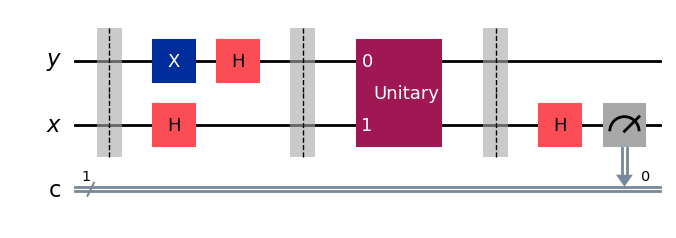

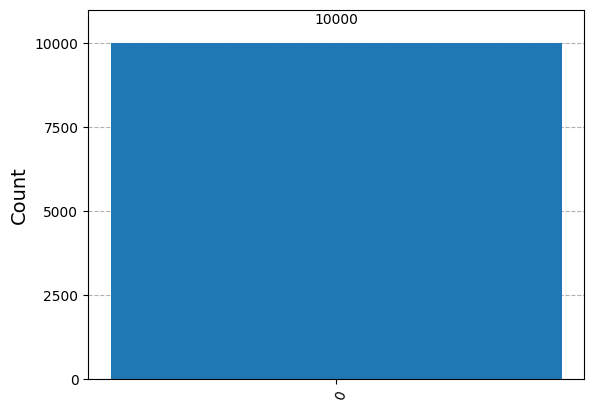

In [53]:
# IMPORTANT NOTE: The readings in Qiskit should be done from bottom up.
#                 The most significant bit (the leftmost in a table or
#                 matrix is the one at the BOTTOM. To keep compatibility
#                 with the sympy and numpy matrices, x will be placed
#                 BELOW and y on TOP.
import numpy as np
Or1 = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]); display(Or1)

import qiskit as qk
from qiskit.quantum_info.operators import Operator

qrx = qk.QuantumRegister(1,'x')
cr = qk.ClassicalRegister(1,"c")
qry = qk.QuantumRegister(1,'y')
qc = qk.QuantumCircuit(qry,qrx,cr)

qc.barrier()
qc.h(qrx)
qc.x(qry)
qc.h(qry)

qc.barrier()
oracle = Operator(Or1)
qc.append(oracle,[qry,qrx])

qc.barrier()
qc.h(qrx)
qc.measure(qrx,cr)

display(qc.draw('mpl'))

simulator = qk_aer.Aer.get_backend("aer_simulator")
results = simulator.run(qk.transpile(qc,simulator),shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

###### In the second case the function is constant and $f(0) = f(1) = 1$. The oracle matrix is presented below (in `numpy`).

The circuit simulation in Qiskit (below) shows that upon measurement the qubit $\langle x|$ will always yield $\langle 0|$ as result.

array([[0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

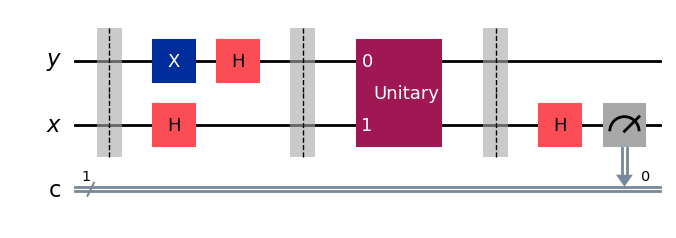

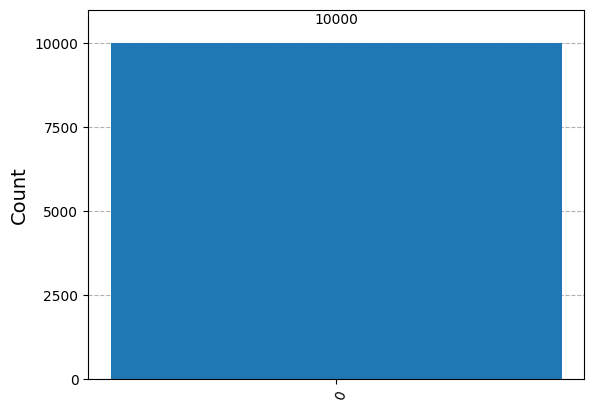

In [54]:
# IMPORTANT NOTE: The readings in Qiskit should be done from bottom up.
#                 The most significant bit (the leftmost in a table or
#                 matrix is the one at the BOTTOM. To keep compatibility
#                 with the sympy and numpy matrices, x will be placed
#                 BELOW and y on TOP.

import numpy as np
Or2 = np.array([[0,1,0,0],[1,0,0,0],[0,0,0,1],[0,0,1,0]]); display(Or2)

import qiskit as qk
from qiskit.quantum_info.operators import Operator

qrx = qk.QuantumRegister(1,'x')
cr = qk.ClassicalRegister(1,"c")
qry = qk.QuantumRegister(1,'y')
qc = qk.QuantumCircuit(qry,qrx,cr)

qc.barrier()
qc.h(qrx)
qc.x(qry)
qc.h(qry)

qc.barrier()
oracle = Operator(Or2)
qc.append(oracle,[qry,qrx])

qc.barrier()
qc.h(qrx)
qc.measure(qrx,cr)

display(qc.draw('mpl'))

simulator = qk_aer.Aer.get_backend("aer_simulator")
results = simulator.run(qk.transpile(qc,simulator),shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

###### In the third case the function is constant and $f(0) = f(1)' = 0$. The oracle matrix is presented below (in `numpy`).

The circuit simulation in Qiskit (below) shows that upon measurement the qubit $\langle x|$ will always yield $\langle 1|$ as result.

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

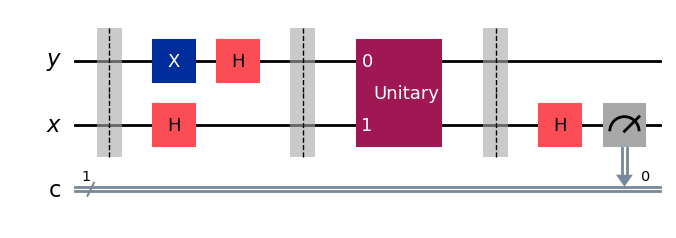

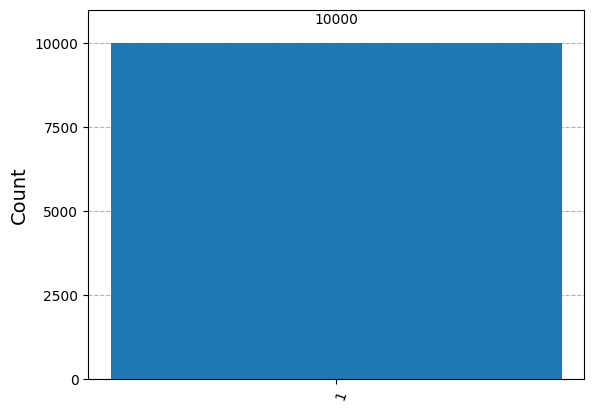

In [55]:
# IMPORTANT NOTE: The readings in Qiskit should be done from bottom up.
#                 The most significant bit (the leftmost in a table or
#                 matrix is the one at the BOTTOM. To keep compatibility
#                 with the sympy and numpy matrices, x will be placed
#                 BELOW and y on TOP. When the function in balanced this
#                 is essential to get the correct measurement (x=<1|)

import numpy as np
Or3 = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]); display(Or3)

import qiskit as qk
from qiskit.quantum_info.operators import Operator

qrx = qk.QuantumRegister(1,'x')
cr = qk.ClassicalRegister(1,"c")
qry = qk.QuantumRegister(1,'y')
qc = qk.QuantumCircuit(qry,qrx,cr)

qc.barrier()
qc.h(qrx)
qc.x(qry)
qc.h(qry)

qc.barrier()
oracle = Operator(Or3)
qc.append(oracle,[qry,qrx])

qc.barrier()
qc.h(qrx)
qc.measure(qrx,cr)

display(qc.draw('mpl'))

simulator = qk_aer.Aer.get_backend("aer_simulator")
results = simulator.run(qk.transpile(qc,simulator),shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

###### In the fourth case the function is constant and $f(0) = f(1)' = 1$. The oracle matrix is presented below (in `numpy`).

The circuit simulation in Qiskit (below) shows that upon measurement the qubit $\langle x|$ will always yield $\langle 1|$ as result.

array([[0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

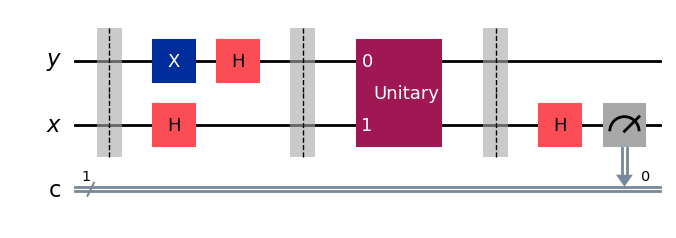

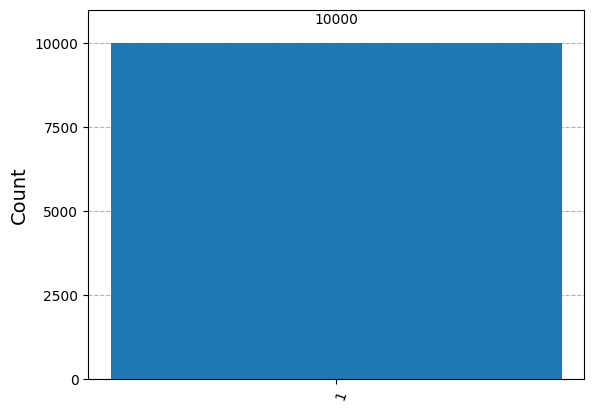

In [56]:
# IMPORTANT NOTE: The readings in Qiskit should be done from bottom up.
#                 The most significant bit (the leftmost in a table or
#                 matrix is the one at the BOTTOM. To keep compatibility
#                 with the sympy and numpy matrices, x will be placed
#                 BELOW and y on TOP. When the function in balanced this
#                 is essential to get the correct measurement (x=<1|)

import numpy as np
Or4 = np.array([[0,1,0,0],[1,0,0,0],[0,0,1,0],[0,0,0,1]]); display(Or4)

import qiskit as qk
from qiskit.quantum_info.operators import Operator

qrx = qk.QuantumRegister(1,'x')
cr = qk.ClassicalRegister(1,"c")
qry = qk.QuantumRegister(1,'y')
qc = qk.QuantumCircuit(qry,qrx,cr)

qc.barrier()
qc.h(qrx)
qc.x(qry)
qc.h(qry)

qc.barrier()
oracle = Operator(Or4)
qc.append(oracle,[qry,qrx])

qc.barrier()
qc.h(qrx)
qc.measure(qrx,cr)

display(qc.draw('mpl'))

simulator = qk_aer.Aer.get_backend("aer_simulator")
results = simulator.run(qk.transpile(qc,simulator),shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

##### **Josza Algorithm**, sympy implementation

$$\begin{array}{ccc|ccc}
x_0&x_1&y&x_0&x_1&f(x) \oplus y\\
\hline
0&0&0& 0&0& f(00)' \\
0&0&1& 0&0& f(00)  \\
0&1&0& 0&1& f(01)' \\
0&1&1& 0&1& f(01)  \\
1&0&0& 1&0& f(10)' \\
1&0&1& 1&0& f(10)  \\
1&1&0& 1&1& f(11)' \\
1&1&1& 1&1& f(11)  \\
\end{array}$$

In [ ]:
import sympy as sp
f00, f00L, f01, f01L, f10, f10L, f11, f11L = \
     sp.symbols('f00 f00L f01, f01L f10 f10L f11, f11L');
Or = sp.Matrix([[f00L, f00 ,    0,    0,    0,    0,    0,    0],
                [f00 , f00L,    0,    0,    0,    0,    0,    0],
                [   0,    0, f01L, f01 ,    0,    0,    0,    0],
                [   0,    0, f01 , f01L,    0,    0,    0,    0],
                [   0,    0,    0,    0, f10L, f10 ,    0,    0],
                [   0,    0,    0,    0, f10 , f10L,    0,    0],
                [   0,    0,    0,    0,    0,    0, f11L, f11 ],
                [   0,    0,    0,    0,    0,    0,  f11, f11L]])
Or

Matrix([
[f00L,  f00,    0,    0,    0,    0,    0,    0],
[ f00, f00L,    0,    0,    0,    0,    0,    0],
[   0,    0, f01L,  f01,    0,    0,    0,    0],
[   0,    0,  f01, f01L,    0,    0,    0,    0],
[   0,    0,    0,    0, f10L,  f10,    0,    0],
[   0,    0,    0,    0,  f10, f10L,    0,    0],
[   0,    0,    0,    0,    0,    0, f11L,  f11],
[   0,    0,    0,    0,    0,    0,  f11, f11L]])

In [ ]:
import sympy as sp
from sympy import kronecker_product as kron
H = sp.Matrix([[1,1],[1,-1]])
I = sp.Matrix([[1,0],[0,1]])

x0=sp.Matrix([[1,0]])
x1=sp.Matrix([[1,0]])
y=sp.Matrix([[0,1]])

#ATENÇÃO: |yx> -> <xy| ou |q2q1q0> -> <q0q1q2| (equivalência ket-bra)
#Logo se utilizamos "bras" no lugar de "kets", o Qiskit deve ser lido
#de cima para baixo e da esquerda para a direita.

josza = kron(x0,kron(x1,y))*(kron(H,kron(H,H)))*(Or)*(kron(H,kron(H,I)))
display(josza.T)

Matrix([
[-f00 + f00L - f01 + f01L - f10 + f10L - f11 + f11L],
[ f00 - f00L + f01 - f01L + f10 - f10L + f11 - f11L],
[-f00 + f00L + f01 - f01L - f10 + f10L + f11 - f11L],
[ f00 - f00L - f01 + f01L + f10 - f10L - f11 + f11L],
[-f00 + f00L - f01 + f01L + f10 - f10L + f11 - f11L],
[ f00 - f00L + f01 - f01L - f10 + f10L - f11 + f11L],
[-f00 + f00L + f01 - f01L + f10 - f10L - f11 + f11L],
[ f00 - f00L - f01 + f01L - f10 + f10L + f11 - f11L]])

**Function balanced $f(00) = f(10) = 0$ and $f(01) = f(11) = 1$**

$\langle100| + \langle101|$ $\rightarrow$ $\langle x_0x_1| = \langle10|$

In [ ]:
josza.subs({f00:0, f00L:1,
            f01:0, f01L:1,
            f10:1, f10L:0,
            f11:1, f11L:0})

Matrix([[0, 0, 0, 0, 4, -4, 0, 0]])

**Function balanced $f(00) = f(11) = 0$ and $f(01) = f(10) = 1$**

$\langle110| + \langle111|$ $\rightarrow$ $\langle x_0x_1| = \langle11|$

In [ ]:
josza.subs({f00:0, f00L:1,
            f01:1, f01L:0,
            f10:1, f10L:0,
            f11:0, f11L:1})

Matrix([[0, 0, 0, 0, 0, 0, 4, -4]])

**Function constant $f(00) = f(01)$ $= f(10) $ $= f(11) = 0$**

$\langle000| + \langle001|$ $\rightarrow$ $\langle x_0x_1| = \langle00|$

In [ ]:
josza.subs({f00:0, f00L:1,
            f01:0, f01L:1,
            f10:0, f10L:1,
            f11:0, f11L:1})

Matrix([[4, -4, 0, 0, 0, 0, 0, 0]])

**Function constant $f(00) = f(01) $ $= f(10)$ $ = f(11) = 1$**

$\langle000| + \langle001|$ $\rightarrow$ $\langle x_0x_1| = \langle00|$

In [ ]:
josza.subs({f00:1, f00L:0,
            f01:1, f01L:0,
            f10:1, f10L:0,
            f11:1, f11L:0})

Matrix([[-4, 4, 0, 0, 0, 0, 0, 0]])

###### **Function neither balanced nor constant $f(00) = f(01) = f(10) = 0$ and $f(11) = 1$**

In [ ]:
josza.subs({f00:0, f00L:1,
            f01:0, f01L:1,
            f10:0, f10L:1,
            f11:1, f11L:0})

Matrix([[2, -2, 2, -2, 2, -2, -2, 2]])